# Trainable Parms and NN Regression (DL)

This covers some theory and application of neural networks for regression! For the first half I will count trainable parameters. Later I will read weather vs. energy (electricity) consumption data in New England, fit and evaluate a model using Neural network regresson. The model also utilizes early stoppings and dropout, which possibly makes the model result better. The result MAE is 1204.4480429687499, and R2 is 0.7418388378068859



# **1.** Recreate the math in the `model.summmary()` below

First, let's make sure you understand the concept of weights and biases.

Imagine that your data set has 20,000 rows and 50 columns. You are to count the trainable parameters and show the output shape for each layer in the network (update `ABCDEFG` below using your own StudentID).



In [ ]:
# leave this as 50 for now
n_features = 50

# put your 7 digit Student ID, replace the 1234567
# if you have a 0 in your studentID, please replace it with a 5 (so the math works out!)
A = 3
B = 5 # replaced to 5 instead of 0
C = 5
D = 8
E = 8
F = 5
G = 3

In [ ]:
# now run this code
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(A, activation='relu', input_shape=(n_features,)))
model.add(Dense(B, activation='relu'))
model.add(Dense(C, activation='relu'))
model.add(Dense(D, activation='relu'))
model.add(Dense(E, activation='relu'))
model.add(Dense(F, activation='relu'))
model.add(Dense(G, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_188 (Dense)           (None, 3)                 153       
                                                                 
 dense_189 (Dense)           (None, 5)                 20        
                                                                 
 dense_190 (Dense)           (None, 5)                 30        
                                                                 
 dense_191 (Dense)           (None, 8)                 48        
                                                                 
 dense_192 (Dense)           (None, 8)                 72        
                                                                 
 dense_193 (Dense)           (None, 5)                 45        
                                                                 
 dense_194 (Dense)           (None, 3)               

In [ ]:
!pip3 install keras_visualizer
from keras_visualizer import visualizer

In [ ]:
visualizer(model, file_format='png', view=True)

### Layer `dense` (153 trainable parameters, 150 weights, 3 bias)
150 weights and 30 bias. There are 150 inputs going into a hidden layer with 3 hidden unit, and there is 3 bias for each of the 3 hidden units in the layer.

$50*3 + 3 = 153$ trainable parameters

### Layer `dense_1` (20 trainable parameters, 15 weights, 5 bias)
15 weights and 5 bias. There are 15 inputs going into a hidden layer with 5 hidden unit, and there is 5 bias for each of the 5 hidden units in the layer.

$3*5 + 5 = 20$ trainable parameters

### Layer `dense_2` (30 trainable parameters, 25 weights, 5 bias)
25 weights and 5 bias. There are 25 inputs going into a hidden layer with 5 hidden unit, and there is 5 bias for each of the 5 hidden units in the layer.

$5*5 + 5 = 25$ trainable parameters

### Layer `dense_3` (48 trainable parameters, 40 weights, 8 bias)
40 weights and 8 bias. There are 40 inputs going into a hidden layer with 8 hidden unit, and there is 8 bias for each of the 8 hidden units in the layer.

$5*8 + 8 = 48$ trainable parameters

### Layer `dense_4` (72 trainable parameters, 64 weights, 8 bias)
64 weights and 8 bias. There are 64 inputs going into a hidden layer with 8 hidden unit, and there is 8 bias for each of the 8 hidden units in the layer.

$8*8 + 8 = 72$ trainable parameters

### Layer `dense_5` (45 trainable parameters, 40 weights, 5 bias)
40 weights and 5 bias. There are 40 inputs going into a hidden layer with 5 hidden unit, and there is 5 bias for each of the 5 hidden units in the layer.

$8*5 + 5 = 45$ trainable parameters

### Layer `dense_6` (18 trainable parameters, 15 weights, 3 bias)
15 weights and 3 bias. There are 15 inputs going into a hidden layer with 3 hidden unit, and there is 3 bias for each of the 3 hidden units in the layer.

$5*3 + 3 = 18$ trainable parameters

### Layer `dense_7` - the output! (4 trainable parameters, 3 weights, 1 bias)
3 weights and 1 bias. There are 3 inputs going into a hidden layer with 1 hidden unit, and there is 1 bias for each of the 1 hidden units in the layer.

$3*1 + 1 = 4$ trainable parameters

To sum all of these weights and biases, I confirm this model has 390 trainable parameters.

# **2.** Fit and evaluate a NN regression model using real-world data
These are hourly observations of weather vs. energy (electricity) consumption in New England.


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Prep the data

### Read the energy/weather data
https://drive.google.com/file/d/1ylQJKeCyMStvvMzRGDo8nR1TI8_3xGgP/view?usp=sharing

In [ ]:
# https://drive.google.com/file/d/1ylQJKeCyMStvvMzRGDo8nR1TI8_3xGgP/view?usp=sharing
!gdown 1ylQJKeCyMStvvMzRGDo8nR1TI8_3xGgP

Downloading...
From: https://drive.google.com/uc?id=1ylQJKeCyMStvvMzRGDo8nR1TI8_3xGgP
To: /content/cleanweather_energy.csv
100% 25.4k/25.4k [00:00<00:00, 67.8MB/s]


In [ ]:
# make the dataset as pandas and assign it to a variable 'energy'
df = pd.read_csv('/content/cleanweather_energy.csv')

### Select columns for modeling
  * Check for missing values and inspect data types
  * The target variable is last column df['MWh']
  * You can use as many columns for X, but you may want to just stick to df['tmpf'] through `df['sknt']` along with the df['HE'] (which is the hour of the day).
    * A data dictionary for the weather data can be found at the bottom of this website: https://mesonet.agron.iastate.edu/request/download.phtml
  * If you want to be an overachiever (and I think you should!), feel free to do some feature engineering (but this is optional)
.
* Use an 80/20 train/val split
* Apply min/max or standard scalar to X_train and apply to X_test

In [ ]:
# take an initial look at the dataset
df.head()

,valid,station,valid.1,lon,lat,tmpf,dwpf,relh,drct,sknt,...,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth,H,Date,HE,MWh
0,2020-08-25 00:00:00,BDL,2020-08-25 00:55:00,-72.6825,41.9381,73.9,69.1,84.97,240.0,3.0,...,M,M,M,M,KBDL 250055Z AUTO 24002KT 10SM CLR 23/21 A2990...,M,D,2020-08-25 00:00:00,0,14986.78
1,2020-08-25 01:00:00,BDL,2020-08-25 01:55:00,-72.6825,41.9381,73.9,70.0,87.63,260.0,4.0,...,M,M,M,M,KBDL 250155Z AUTO 21002KT 10SM CLR 23/21 A2988...,M,D,2020-08-25 01:00:00,1,14433.29
2,2020-08-25 02:00:00,BDL,2020-08-25 02:55:00,-72.6825,41.9381,72.0,70.0,93.43,230.0,5.0,...,M,M,M,M,KBDL 250255Z AUTO 19004KT 10SM CLR 23/21 A2987...,M,D,2020-08-25 02:00:00,2,14152.24
3,2020-08-25 03:00:00,BDL,2020-08-25 03:55:00,-72.6825,41.9381,73.0,70.0,90.32,230.0,5.0,...,M,M,M,M,KBDL 250355Z AUTO 23002KT 10SM CLR 22/21 A2987...,M,D,2020-08-25 03:00:00,3,13846.08
4,2020-08-25 04:00:00,BDL,2020-08-25 04:55:00,-72.6825,41.9381,72.0,70.0,93.43,190.0,5.0,...,M,M,M,M,KBDL 250455Z AUTO 00000KT 10SM CLR 22/21 A2987...,M,D,2020-08-25 04:00:00,4,13872.55


Let's see the data dictionary to better interpret the table.
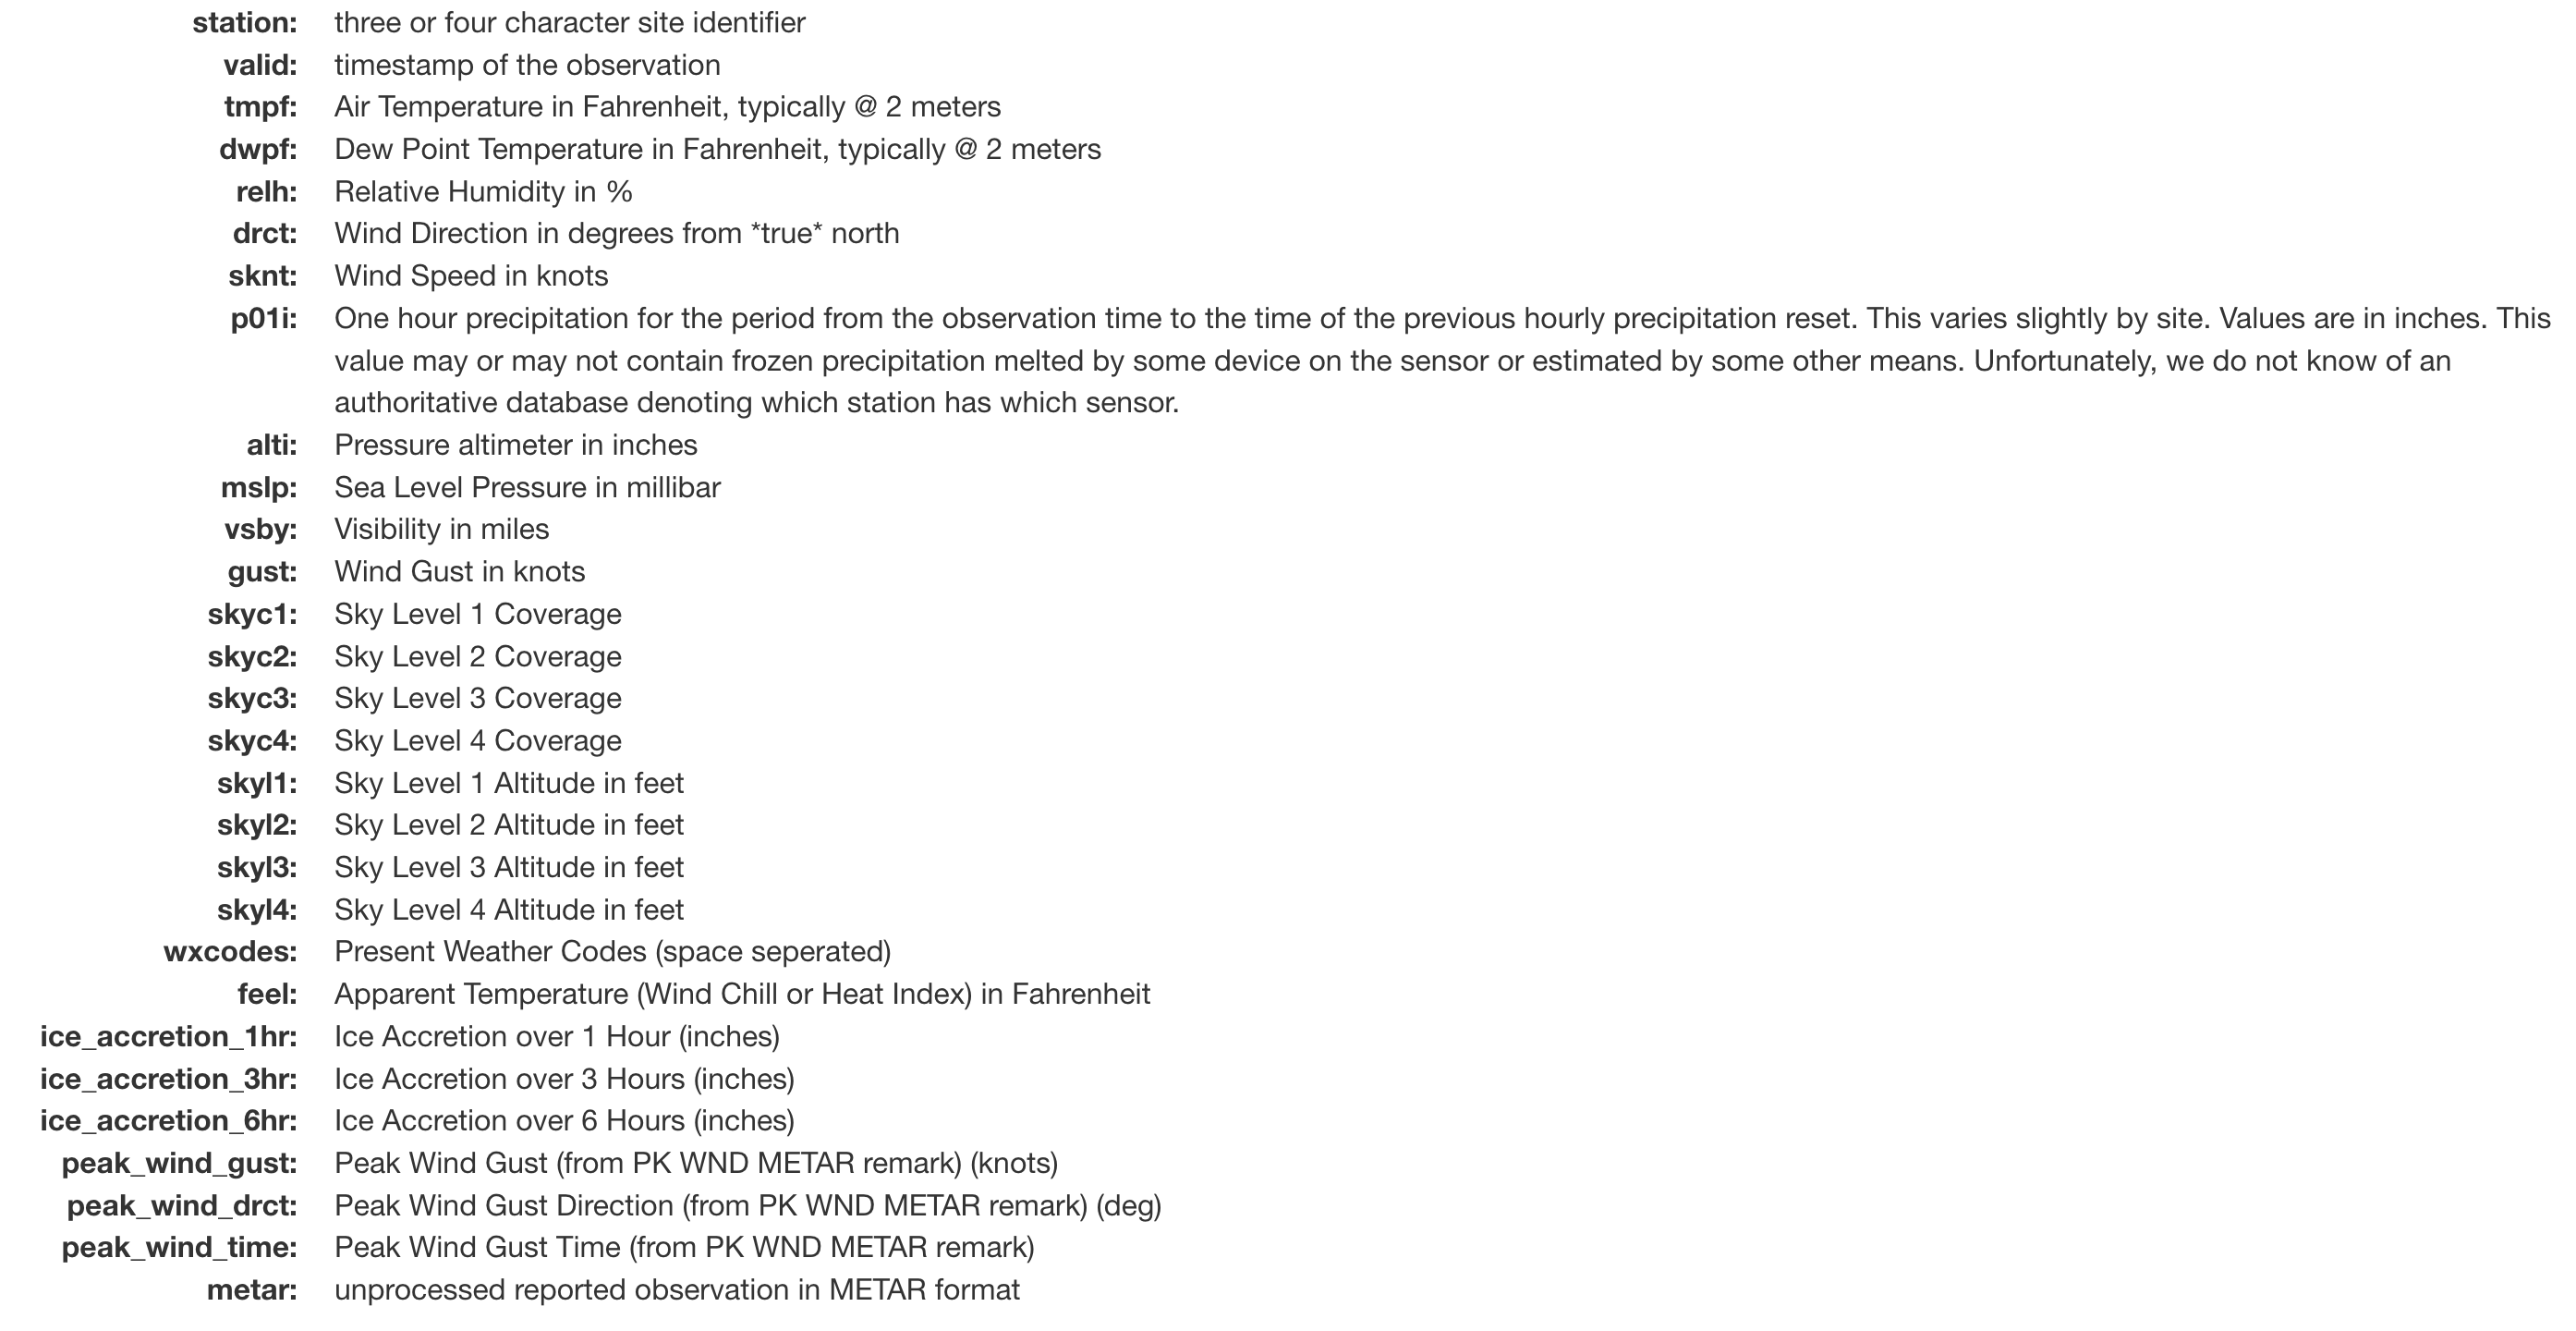

variables to use in the model, I will follow professor's suggestion to use 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'HE' columns because they represent the weather directly. Other variables are indirect and does not have intuitive information regarding the weather.

#### Check for missing values and inspect data types

Now move onto checking data types and how many records does this dataset has.

In [ ]:
# inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valid              96 non-null     object 
 1   station            96 non-null     object 
 2   valid.1            96 non-null     object 
 3   lon                96 non-null     float64
 4   lat                96 non-null     float64
 5   tmpf               96 non-null     float64
 6   dwpf               96 non-null     float64
 7   relh               96 non-null     float64
 8   drct               96 non-null     float64
 9   sknt               96 non-null     float64
 10  p01i               96 non-null     float64
 11  alti               96 non-null     float64
 12  mslp               96 non-null     float64
 13  vsby               96 non-null     float64
 14  gust               22 non-null     float64
 15  skyc1              96 non-null     object 
 16  skyc2              96 non-nu

A lot of them are string, and some of them are numeric.

In [ ]:
# Check for missing values
df.isna().sum()

valid                 0
station               0
valid.1               0
lon                   0
lat                   0
tmpf                  0
dwpf                  0
relh                  0
drct                  0
sknt                  0
p01i                  0
alti                  0
mslp                  0
vsby                  0
gust                 74
skyc1                 0
skyc2                 0
skyc3                 0
skyc4                 0
skyl1                 0
skyl2                 0
skyl3                 0
skyl4                 0
wxcodes               0
ice_accretion_1hr     0
ice_accretion_3hr     0
ice_accretion_6hr     0
peak_wind_gust        0
peak_wind_drct        0
peak_wind_time        0
feel                  0
metar                 0
snowdepth             0
H                     0
Date                  0
HE                    0
MWh                   0
dtype: int64

only 'gust' column has missing values. But I am not using the column into the model so I can disregard it.

Now I want to change df including only columns that I am using into the model.

#### Target variable and independent variables (features)

In [ ]:
# use only columns that will be into the model
df = df[['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'HE', 'MWh']]

In [ ]:
# check the datatype again. are they numeric? string?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpf    96 non-null     float64
 1   dwpf    96 non-null     float64
 2   relh    96 non-null     float64
 3   drct    96 non-null     float64
 4   sknt    96 non-null     float64
 5   HE      96 non-null     int64  
 6   MWh     96 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 5.4 KB


clean and neat! no missing values, all of them are numeric.
Let's check the head as well so that I can better understand the data.

In [ ]:
df.head()

,tmpf,dwpf,relh,drct,sknt,HE,MWh
0,73.9,69.1,84.97,240.0,3.0,0,14986.78
1,73.9,70.0,87.63,260.0,4.0,1,14433.29
2,72.0,70.0,93.43,230.0,5.0,2,14152.24
3,73.0,70.0,90.32,230.0,5.0,3,13846.08
4,72.0,70.0,93.43,190.0,5.0,4,13872.55


Re-writing the data dictionary again here.

tmpf:
Air Temperature in Fahrenheit, typically @ 2 meters

dwpf:
Dew Point Temperature in Fahrenheit, typically @ 2 meters

relh:
Relative Humidity in %

drct:
Wind Direction in degrees from *true* north

sknt:
Wind Speed in knots

HE:
the hour of the day.

Table looks good, everything looks great!!

In [ ]:
# check the correlations in df
corr = df.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,tmpf,dwpf,relh,drct,sknt,HE,MWh
tmpf,1.000000,0.317612,-0.489865,0.069390,0.583003,0.475320,0.785294
dwpf,0.317612,1.000000,0.653731,-0.335717,-0.239651,-0.053112,0.428979
relh,-0.489865,0.653731,1.000000,-0.350857,-0.636158,-0.379740,-0.212163
drct,0.069390,-0.335717,-0.350857,1.000000,0.379757,0.107126,-0.139674
sknt,0.583003,-0.239651,-0.636158,0.379757,1.000000,0.526902,0.432027
HE,0.475320,-0.053112,-0.379740,0.107126,0.526902,1.000000,0.459646
MWh,0.785294,0.428979,-0.212163,-0.139674,0.432027,0.459646,1.000000


tmpf has the highest correlation with MWh followed by HE.

In [ ]:
# now separate target variable df['MWh']
y = df[['MWh']]

In [ ]:
# separate independent variables from df
X = df.drop(['MWh'], axis = 1)

In [ ]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Use an 80/20 train/val split

In [ ]:
# import train test split
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y,
                                                     test_size = 0.2, # 80/20 train/test split
                                                     shuffle = True,
                                                     random_state = 3058853 # chanju's student id
                                                     )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #check the shape

(76, 6) (20, 6) (76, 1) (20, 1)


### Apply min/max or standard scalar to X_train and apply to X_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# learn the range on X_train, and apply scaling to X_test
scaler = MinMaxScaler() # import the scaler
X_train = scaler.fit_transform(X_train) # learn and apply to train
X_test = scaler.transform(X_test) # simply apply to the test data

## Build, compile and fit a model

### Build the model
* You must use  dropout and early stopping (make sure you return the best weights, you can choose what value of patience to use.)
  * Here are some hints and a nice example of using dropout - values between 0.2 and 0.5 work well. https://machinelearningknowledge.ai/keras-dropout-layer-explained-for-beginners/

In [ ]:
# modules for neural nets
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
# build the model with dropout.
model2 = Sequential() # name it model2 so that it doesn't overlap with model on Q1.
# this is hidden layer. I will use 9 hidden layers because it will make model performance better!
model2.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu')) # the number of columns of X_train, and # of samples are not defined yet. use 'relu' to recode negative predictions to 0.
model2.add(Dropout(0.1)) # I chose 0.1 to process the model faster. 10% of the units are deactivated.
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.1))
# this is the output node
model2.add(Dense(1, activation='linear')) # it's a regression model so I am using 'linear' that would able the output layer to have negative infinity to positive infinity outputs.
model2.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_196 (Dense)           (None, 100)               700       
                                                                 
 dropout_41 (Dropout)        (None, 100)               0         
                                                                 
 dense_197 (Dense)           (None, 100)               10100     
                                                                 
 dropout_42 (Dropout)        (None, 100)               0         
                                                                 
 dense_198 (Dense)           (None, 100)               10100     
                                                                 
 dropout_43 (Dropout)        (None, 100)               0         
                                                                 
 dense_199 (Dense)           (None, 100)             

### Compile the model

In [ ]:
# compile the model to track model evaluation metrics.
model2.compile(optimizer='Adam', loss='mse', metrics=['mae'])
# optimizer to minimize a defined loss function. I chose adam(Adaptive Moment Estimation) because it adapts the learning rates for each parameter individually based on their historical gradients.
# loss function mean_squared_error quantifies pred-actual values and minimize mse.
# metrics mean_absolute_error to evaluate the model during and after training.

### Fit the model with early stopping

In [ ]:
# now fit the model with early stopping to stop when there is no improvement, reducing a burden to computer as well.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', # monitor validation loss and it decreases over epochs
                   patience=10, # 10 consecutive epochs with no improvement in the monitored metric are tolerated before early stopping is triggered.
                   restore_best_weights=True) # when early stopping is triggered, the model's weights will be restored to the best weights found during training
energy = model2.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=4000, # the number of times the entire training dataset is passed forward and backward through the neural network
                    batch_size = 10, # 10 data samples at a time during each training iteration.
                    verbose=1, # show results
                    callbacks=[es]) # include early stopping into the model

Epoch 1/4000
8/8 [==============================] - 5s 81ms/step - loss: 211619328.0000 - mae: 14355.0820 - val_loss: 227076448.0000 - val_mae: 14779.6436
Epoch 2/4000
8/8 [==============================] - 0s 12ms/step - loss: 211530960.0000 - mae: 14352.0342 - val_loss: 226809088.0000 - val_mae: 14770.7393
Epoch 3/4000
8/8 [==============================] - 0s 16ms/step - loss: 210685488.0000 - mae: 14322.5967 - val_loss: 224273872.0000 - val_mae: 14686.2158
Epoch 4/4000
8/8 [==============================] - 0s 19ms/step - loss: 202752752.0000 - mae: 14047.5195 - val_loss: 201586800.0000 - val_mae: 13907.7812
Epoch 5/4000
8/8 [==============================] - 0s 15ms/step - loss: 142418304.0000 - mae: 11662.0557 - val_loss: 55204608.0000 - val_mae: 7028.2759
Epoch 6/4000
8/8 [==============================] - 0s 19ms/step - loss: 35390440.0000 - mae: 4911.3794 - val_loss: 6406998.0000 - val_mae: 1899.9156
Epoch 7/4000
8/8 [==============================] - 0s 16ms/step - loss: 1737

## Evaluate the model

### Make a learning curve for train and validation loss

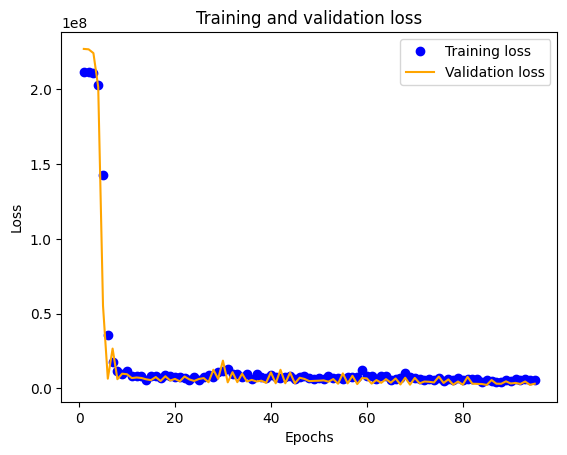

In [ ]:
# learning curve
# let's see the training and validation loss by epoch
history_dict = energy.history # model.fit() returns a History object, which is a dictionary containing data about everything that happened during training.
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1) # number of epochs
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This model seemed to converge around 10 epochs with dropout.

### Create a scatterplot of actual vs. predicted for each partition

1/1 [==============================] - 0s 83ms/step


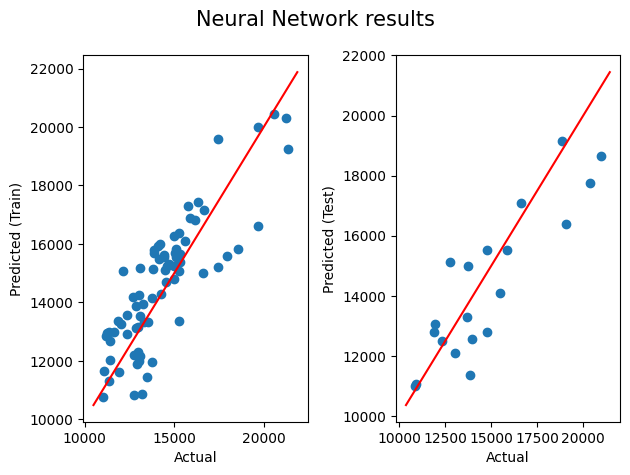

In [ ]:
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns - two plots in one line

# assign preds variables
train_preds = model2.predict(X_train)
test_preds = model2.predict(X_test)

# make a title
fig.suptitle("Neural Network results", fontsize=15)

# Train subplots
axes[0].scatter(x=y_train, y=train_preds) # axes[0] meaning first figure, x axis as acutual, y axis as predicted
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (Train)",  fontsize=10)

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Test subplots
axes[1].scatter(x=y_test, y=test_preds) # axes[1] means second figure, x axis as acutual, y axis as predicted
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (Test)",  fontsize=10)

# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

Hard to tell if it overfit or not. but it doesn't look that bad. let's check error metrics.

### Calculate MAE, RMSE and R2 for each partition.

In [ ]:
# import MAE, RMSE and R2 score metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# MAE
print("Train MAE is", mean_absolute_error(y_train, train_preds))
print("Test MAE is", mean_absolute_error(y_test, test_preds))

# RMSE
print("Train RMSE is", mean_squared_error(y_train, train_preds))
print("Test RMSE is", mean_squared_error(y_test, test_preds))

# R2
print("Train R2 is", r2_score(y_train, train_preds))
print("Test R2 is", r2_score(y_test, test_preds))

Train MAE is 1082.6932632606906
Test MAE is 1204.4480429687499
Train RMSE is 1743534.4840739889
Test RMSE is 2230232.604119267
Train R2 is 0.6859040721919989
Test R2 is 0.7418388378068859


## Lessons learned



* The optimizers in compiling makes the model performance very different. I tried SGD first time, and the model result was terrible. R2 was negative values. When I tried other optimizers such as adam and RMSprop, I could get positive r2 values.
* Increased units in the layer helps improve the model's performance because each units potentially helps to reach to output more accurately.
* Increased dropout decreased model performance of information loss. It also led to underfitting. I will keep the dropout low...
* Increased number of hidden layers helps model's performance better. I first tried one hidden layers and now 9 hidden layers. R2 was 0.20 and now 0.74 whoo whoo!
* Too big batch size limit number of epochs so that learning curve does not have intuitive result.

